In [43]:
import networkx as nx
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sys, os

In [44]:
my_path = os.path.abspath("")
data = pd.read_csv(my_path + "/Data_initial" + '/fb-messages.edges', delimiter=',')

In [45]:
print(data)

        730  730.1  1080090715.0
0       563    563  1.080091e+09
1       674    674  1.080718e+09
2       571    571  1.081366e+09
3       667    667  1.082013e+09
4       563    667  1.082034e+09
...     ...    ...           ...
61728  1382    979  1.098769e+09
61729  1382   1322  1.098770e+09
61730  1382     28  1.098770e+09
61731  1098     67  1.098770e+09
61732  1098     67  1.098770e+09

[61733 rows x 3 columns]


In [46]:
data.rename(columns = {'730':'Source', '730.1':'Target', '1080090715.0':'Time_start'}, inplace = True )

In [47]:
print(data)

       Source  Target    Time_start
0         563     563  1.080091e+09
1         674     674  1.080718e+09
2         571     571  1.081366e+09
3         667     667  1.082013e+09
4         563     667  1.082034e+09
...       ...     ...           ...
61728    1382     979  1.098769e+09
61729    1382    1322  1.098770e+09
61730    1382      28  1.098770e+09
61731    1098      67  1.098770e+09
61732    1098      67  1.098770e+09

[61733 rows x 3 columns]


In [48]:
data_1 = data.iloc[0:60000]

In [49]:
print(data_1)

       Source  Target    Time_start
0         563     563  1.080091e+09
1         674     674  1.080718e+09
2         571     571  1.081366e+09
3         667     667  1.082013e+09
4         563     667  1.082034e+09
...       ...     ...           ...
59995    1466     353  1.095485e+09
59996    1481    1847  1.095485e+09
59997    1481    1478  1.095486e+09
59998    1580    1617  1.095488e+09
59999    1220     563  1.095513e+09

[60000 rows x 3 columns]


In [50]:
data_1.to_csv(my_path + "/Data_postproc" + '/output.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)
data_1.to_csv(my_path + "/Data_postproc" + '/fb-messages.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)
data_1[['Source', 'Target']].to_csv(my_path + "/Data_postproc" + '/Output_wt.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)

In [51]:
# data_out = data_1.copy()
# data_out.drop(['Time_start'], axis=1)
# data_out.to_csv(my_path + "/Data_postproc" + '/output_wt.csv', encoding='utf-8', \
#               date_format="%Y-%m-%d-%H-%M-%S", index=False)

<span style="color:orange">
    
## Исследование распределения связей ##

<span style="color:orange">
Задание графа на данных без времени (статический граф)
И вычисление PageRank

In [89]:
data_1 = data.copy()
data_1.drop(['Time_start'], axis= 1 , inplace= True)
data_list = data_1.values.tolist()

G = nx.Graph()
G.add_edges_from(data_list)
G.remove_edges_from(nx.selfloop_edges(G))

comm = nx.community.louvain_communities(G, seed=123)
pr = nx.pagerank(G, alpha=0.9)

In [90]:
X = list(pr.values())

# X = np.empty(1)

# for i in data['Source'].unique():
#     X = np.append(X, (data[data['Target'] == i].size))

Xord = np.sort(X, axis=0)
MaxN = len(X)

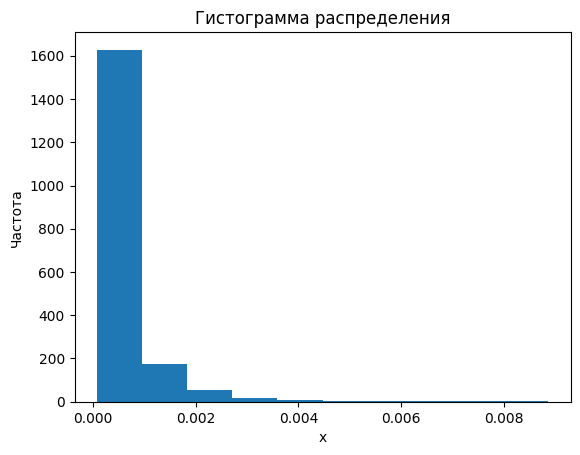

In [54]:
plt.hist(X), #bins = 150, range = (0, 200), color = 'blue')
plt.xlabel('x')
plt.ylabel('Частота')
plt.title("Гистограмма распределения")
plt.show()

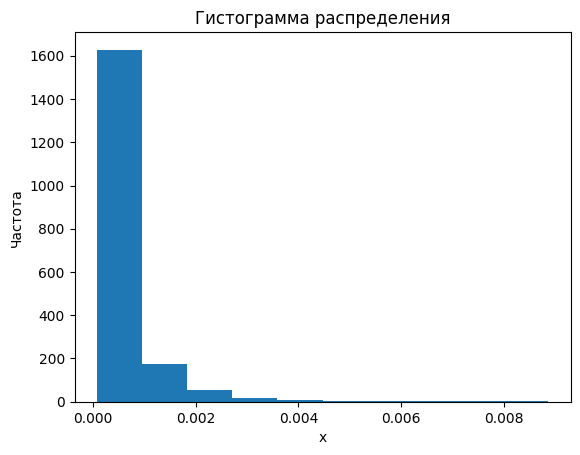

In [55]:
plt.hist(X)#, bins = 150, range = (0, 500), color = 'blue')
plt.xlabel('x')
plt.ylabel('Частота')
plt.title("Гистограмма распределения")
plt.show()

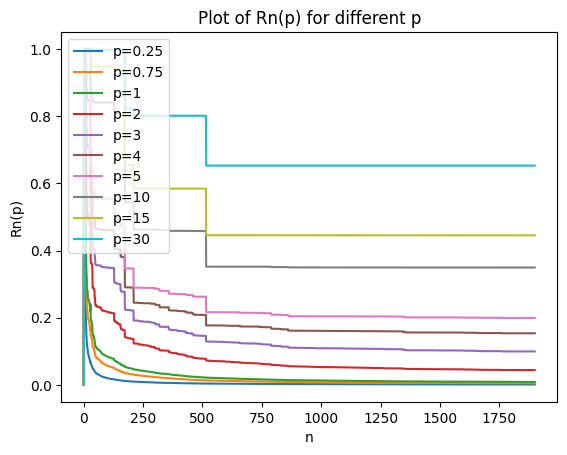

In [56]:
#2 exersice

arrP = [0.25, 0.75,1, 2, 3, 4, 5, 10, 15, 30] #задание диапозона на p
MaxP = len(arrP)
n = 0 
p = 0 
modX = np.zeros((MaxN, MaxP))
Rn = np.zeros((MaxN, MaxP))


for p in range(0, MaxP):
    modX[:, p] = np.power(np.abs(X), arrP[p])
    Mn = 0
    Sn = 0
    for n in range(1, MaxN): 
        Mn = np.max(modX[0:n, p])
        Sn = np.sum(modX[0:n, p])
        Rn[n][p] = Mn / Sn


pltN = np.arange(1, MaxN+1, 1)
legend = []

for p in range(0, MaxP):
    plt.plot(pltN, Rn[:, p])
    legend.append(f"p={arrP[p]}")
    
plt.legend(legend, loc="upper left")
plt.xlabel('n') #Подпись для оси х
plt.ylabel('Rn(p)') #Подпись для оси y
plt.title('Plot of Rn(p) for different p') #Название
plt.show()



#Не понятно как сделать выводы о моментах 

<span style="color:orange">

По итогам исследования можно сказать, 
Для $p \in \lbrace 0.25, 0.75, 1 \rbrace $ $R_{n}(p)$ по всей видимости стремиться к нулю при возрастании n.
Для $p \in \lbrace 2, 3, 4, 5, 10, 15, 30 \rbrace $ $ Rn(p)$ по всей видимости стремиться к положительной константе при возрастании n.

Вывод: $E|X|^{p} < \infty$ для $p \leqslant 1$ только, $E|X|^{p} = \infty$ для $p > 1$.


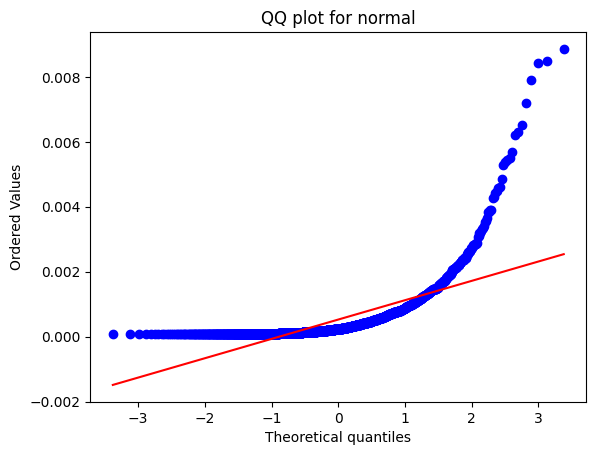

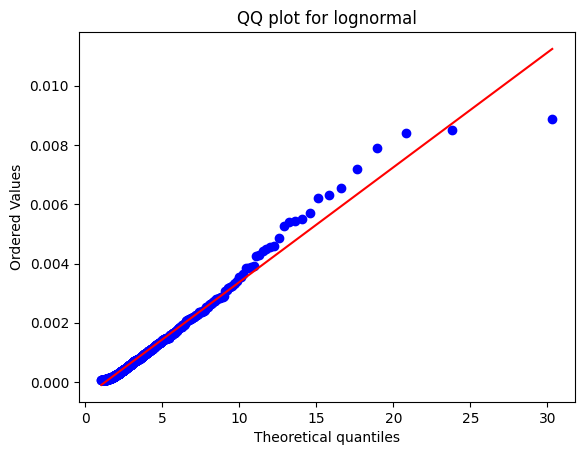

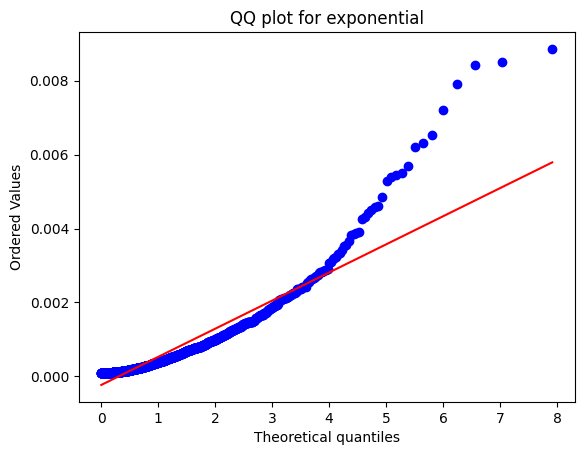

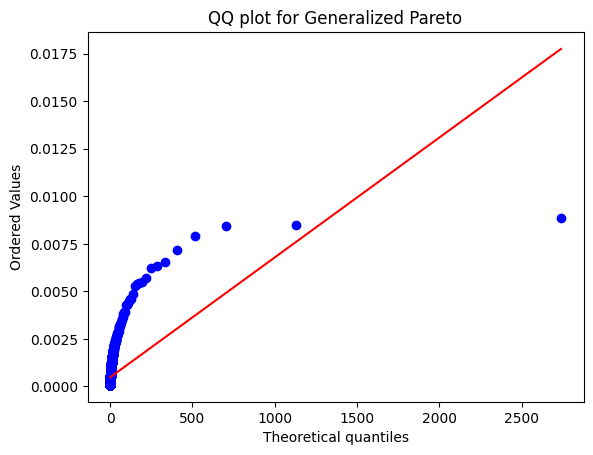

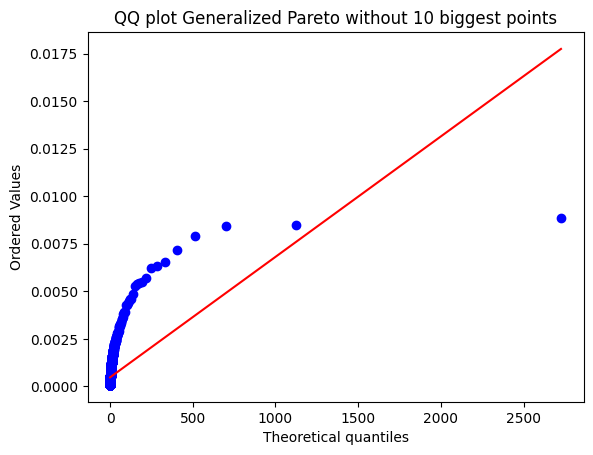

In [57]:
#3 exersice

stats.probplot(Xord, dist="norm", plot=plt)
plt.title('QQ plot for normal') #Название
#plt.ylim([-5, 20])
plt.show()

stats.probplot(Xord, dist=stats.lognorm(1,1), plot=plt)
plt.title('QQ plot for lognormal') #Название
#plt.ylim([-5, 20])
plt.show()

stats.probplot(Xord, dist=stats.expon, plot=plt)
plt.title('QQ plot for exponential') #Название
#plt.ylim([-5, 20])
plt.show()

stats.probplot(Xord, dist=stats.genpareto(1), plot=plt)
plt.title('QQ plot for Generalized Pareto') #Название
#plt.xlim([0, 200])
#plt.ylim([-5, 20])
plt.show()

plt_dat = np.arange(1, 10, 1) 
Xord_noP = np.delete(Xord, plt_dat, axis=0)
stats.probplot(Xord_noP, dist=stats.genpareto(1), plot=plt)
plt.title('QQ plot Generalized Pareto without 10 biggest points') #Название
#plt.xlim([0, 200])
#plt.ylim([-5, 20])
plt.show()

#зависит ли QQ plot от параметров распределений типа (1, 1)
#В парето распределении какое задавать гамма и сигма


<span style="color:orange">

Постановка задачи:
Построить QQ-plot для упорядоченных данных для распределений: нормального, логнормального, экспоненциального и Парето общего.

На графиках представлен QQ-plot, где красная линия $y=x$
Вывод: логнормальное распределение относительно подходит под выборку.

In [58]:
#4 exersice
#print(X)

# U = np.arange(0, 0.1, 0.0001)
# En = np.zeros(len(U))
# SumUp = 0
# SumDn = 0

# for u in range (0, len(U)):
#     SumUp = 0
#     SumDn = 0
#     for i in range (0, len(X)):
#         if (X[i] > U[u]):
#             SumUp += X[i]
#             SumDn += 1
#     En[u] = SumUp / SumDn


# pltN = np.arange(1, MaxN+1, 1)
# legend = []

# plt.plot(U, En)
# plt.xlabel('u') #Подпись для оси х
# plt.ylabel('En(u)') #Подпись для оси y
# plt.title('Plot of En(u)') #Название
# plt.show()


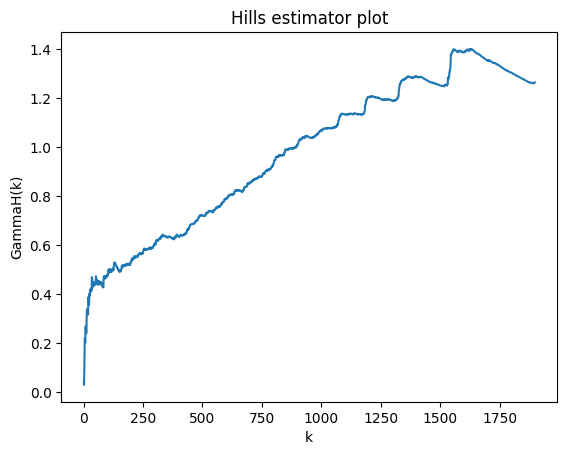

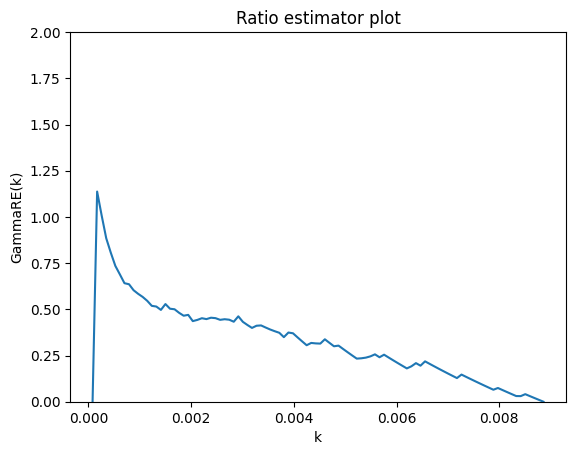

0.42872495202727273


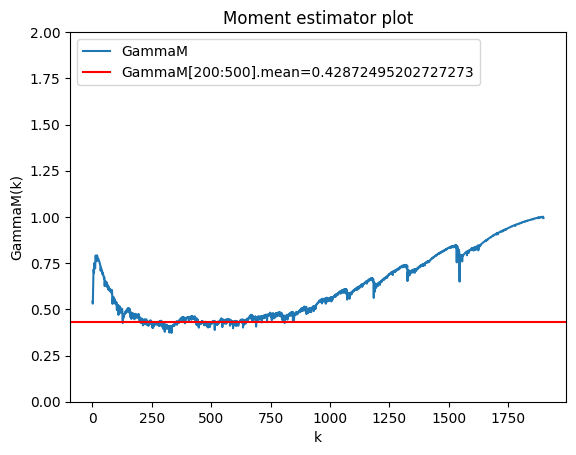

0.3893937768427499


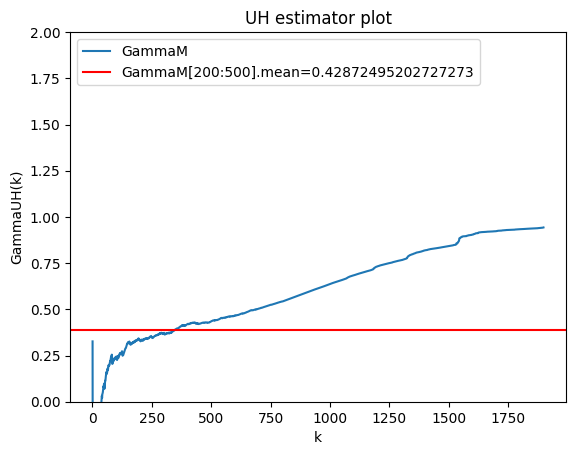

0.6526215515952788


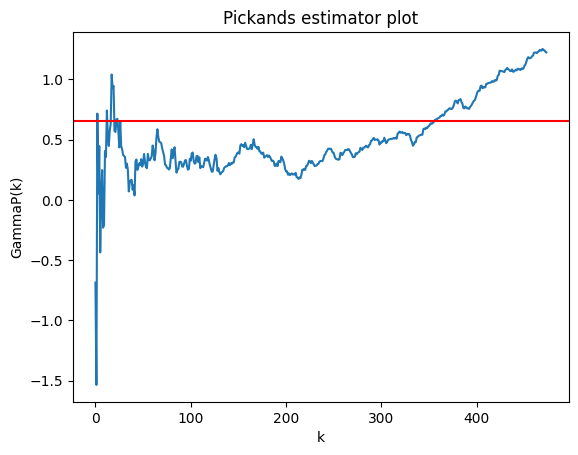

In [59]:
#5 exersice

MaxN = len(X) - 1
MaxNRange = len(X)
MaxK = len(X) - 1


#Hills estimator
def Hill(X):
    GammaH = np.zeros(MaxK)
    Xord = np.sort(X, axis=0)
    Max = len(X) - 1
    for k in range (0, Max):
        GammaH[k] = (1/(k+1)) * np.sum(np.log(Xord[-1:-(k+2):-1])) - np.log(Xord[-(k+2)])
    return GammaH

GammaH = Hill(X)


#Ratio estimator
Level = np.linspace(Xord[0], Xord[-1], 100)
REst = np.zeros(len(Level))

for n in range (1, len(Level)-1):
    SumUp = 0
    SumDn = 0
    for i in range(0, len(X)):
        if (X[i] > Level[n]):
            SumUp += np.log(X[i] / Level[n])
            SumDn += 1
    REst[n] = SumUp / SumDn


#Moment estimator
GammaM = np.zeros(MaxK)
for k in range (0, MaxK):
    SumDn = 0
    for i in range(0, k+1): 
        SumDn += (np.log(Xord[-1-i+1]) - np.log(Xord[-1-k])) ** 2
    SumDn /= k+1
    GammaM[k] = GammaH[k] + 1 - 0.5 / (1 - (GammaH[k] ** 2) / SumDn)


#UH estimator
GammaUH = np.zeros(MaxK)
UH = np.zeros(MaxK)
for i in range(0, MaxK):
    UH[i] = Xord[-(i+2)] * GammaH[i]

for k in range (0, MaxK-1):
    GammaUH[k] = (1/(k+1)) * np.sum(np.log(UH[0:k+1])) - np.log(UH[k+1])  
GammaUH[MaxK-1] = GammaUH[MaxK-2]

#Pickands's estimator
GammaP = np.zeros(round(MaxK/4))
for k in range(0, round(MaxK/4)):
    GammaP[k] = (1/np.log(2)) * (np.log((Xord[-(1+k)] - Xord[-(2*k+2)]) /(Xord[-(2*k+2)] - Xord[-(4*k+4)])))
    

PltN = np.arange(1, MaxN+1, 1)
PltP = np.arange(0, round(MaxK/4), 1)
legend = []

plt.plot(PltN, GammaH)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaH(k)') #Подпись для оси y
plt.title('Hills estimator plot') #Название
#plt.savefig(my_path + '/Exercise51.png')
plt.show()

plt.plot(Level, REst)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaRE(k)') #Подпись для оси y
plt.title('Ratio estimator plot') #Название
plt.ylim(0, 2)
#plt.savefig(my_path + '/Exercise52.png')
plt.show()

plt.plot(PltN, GammaM)
plt.axhline(y = GammaM[200:500].mean(), color = 'r', linestyle = '-')
print(GammaM[200:500].mean())
legend.append("GammaM")
legend.append(f"GammaM[200:500].mean={GammaM[200:500].mean()}")
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaM(k)') #Подпись для оси y
plt.title('Moment estimator plot') #Название
plt.ylim(0, 2)
plt.legend(legend, loc="upper left")
#plt.savefig(my_path + '/Exercise53.png')
plt.show()

legend = []
plt.plot(PltN, GammaUH)
plt.axhline(y = GammaUH[200:500].mean(), color = 'r', linestyle = '-')
print(GammaUH[200:500].mean())
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaUH(k)') #Подпись для оси y
plt.title('UH estimator plot') #Название
plt.ylim(0, 2)
legend.append("GammaM")
legend.append(f"GammaM[200:500].mean={GammaM[200:500].mean()}")
plt.legend(legend, loc="upper left")
#plt.savefig(my_path + '/Exercise54.png')
plt.show()

legend = []
plt.plot(PltP, GammaP)
plt.axhline(y = GammaP[200:500].mean(), color = 'r', linestyle = '-')
print(GammaP[200:500].mean())
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaP(k)') #Подпись для оси y
plt.title('Pickands estimator plot') #Название
#plt.ylim(0, 2)
#plt.savefig(my_path + '/Exercise55.png')
plt.show()
#Прочитать, что значит знак гаммы
#Как выбирать xn в Ratio Estimator, он из выборки или нет.

1.580621414599551


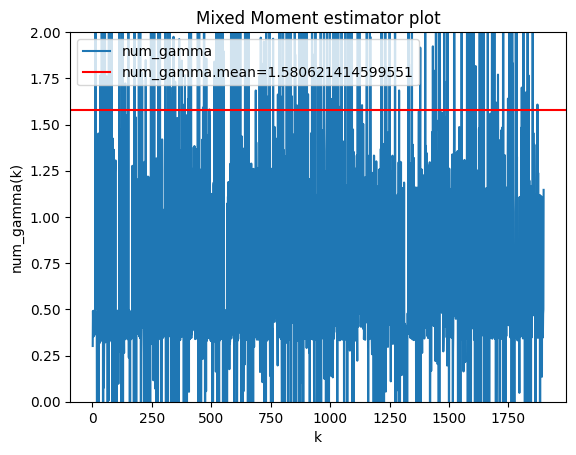

In [96]:
num_gamma = []
GammaMM_k = 0
L_MM_n = 0
M_MM_n = 0
MM_phi = 0

for k in range(1, len(X)):
#    print(k)
    L_MM_n = 1 - (1/k) * np.sum(np.divide(X[-1-k], X[-1:(-1-k):-1]))
#    print('1', L_MM_n)

    M_MM_n = (1/k) * np.sum(np.log(np.divide(X[-1:(-1-k):-1], X[-1-k])))
#    print('2', M_MM_n)

    MM_phi = np.divide((M_MM_n - L_MM_n), \
                    np.multiply(L_MM_n, L_MM_n))
#    print('3', MM_phi)
                   
    GammaMM_k = np.divide((MM_phi - 1), (1 + 2 * np.min((MM_phi - 1), 0)))
#    print('4', GammaMM_k)

    num_gamma.append(GammaMM_k)

#print('5', num_gamma)
PltN = np.arange(1, len(X), 1)

out = pd.Series(num_gamma)  
print(out.mean())
#print(num_gamma[(num_gamma<2) & (num_gamma>0)].mean())
    
legend1 = []
plt.plot(PltN, num_gamma)
plt.axhline(y = out[0:len(PltN)].mean(), color = 'r', linestyle = '-')
legend1.append("num_gamma")
legend1.append(f"num_gamma.mean={out[0:len(PltN)].mean()}")
plt.xlabel('k') #Подпись для оси х
plt.ylabel('num_gamma(k)') #Подпись для оси y
plt.title('Mixed Moment estimator plot') #Название
plt.ylim(0, 2)
plt.legend(legend1, loc="upper left")
#plt.savefig(my_path + '/Exercise53.png')
plt.show()

<span style="color:orange">

Оценку хвостового индекса сделать затруднительно.

In [ ]:
#6 exersice

MaxN = len(X)
B = 100
PlotCIup = []
PlotCIdn = []
PlotCImn = []

#Bootstrap
y = np.zeros((B, MaxN))
GammaH_Boot = np.zeros((B, MaxN-1))
Gamma_stable = np.zeros(B) #стабильность графика замечается на 300 значении

#StDev_Gamma = np.zeros(B)
for i in range(B):
    for j in range(MaxN):
        y[i,j] = random.choice(list(X))
    GammaH_Boot[i,:] = Hill(y[i,:])
#        Mean_Gamma[i] = GammaH_Boot[i,:].mean()
#        StDev_Gamma[i] = GammaH_Boot[i,:].std()
#    Gamma_stable[i] = GammaH_Boot[i, 300]

for i in range(MaxN-1):
#    Data75 = stats.norm.interval(0.75, loc=np.mean(Gamma_stable), scale=stats.sem(Gamma_stable))
    Data95 = stats.norm.interval(0.95, loc=np.mean(GammaH_Boot[:, i]), scale=stats.sem(GammaH_Boot[:, i]))
#    Data99 = stats.norm.interval(0.99, loc=np.mean(Gamma_stable), scale=stats.sem(Gamma_stable))
    PlotCIup.append(Data95[0])
    PlotCIdn.append(Data95[1])
    PlotCImn.append(GammaH_Boot[:, i].mean())

legend = []

plt.plot(PlotCIup)
legend.append("Верхняя грань доверительного интервала")
plt.plot(PlotCIdn)
legend.append("Нижняя грань доверительного интервала")
plt.plot(PlotCImn)
legend.append("Hill's plot")

plt.legend(legend, loc="upper left")
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaH(k)') #Подпись для оси y
plt.title(f"Hills estimator с доверительным интервалом при B = {B} и P = {0.95} ") #Название
#plt.savefig(my_path + '/Exercise6.png')
plt.show()

<span style="color:orange">
    
## Разбиение на сообщества ##

In [63]:
my_path = os.path.abspath("")
data = pd.read_csv(my_path + "/Data_initial" + '/fb-messages.edges', delimiter=',')
data.rename(columns = {'730':'Source', '730.1':'Target', '1080090715.0':'Time_start'} \
           , inplace = True )

In [64]:
print(data_1)

       Source  Target
0         563     563
1         674     674
2         571     571
3         667     667
4         563     667
...       ...     ...
61728    1382     979
61729    1382    1322
61730    1382      28
61731    1098      67
61732    1098      67

[61733 rows x 2 columns]


In [65]:
# data_1 = data.copy()
# data_1.drop(['Time_start'], axis= 1 , inplace= True)
# data_list = data_1.values.tolist()

# G = nx.Graph()
# G.add_edges_from(data_list)
# G.remove_edges_from(nx.selfloop_edges(G))

# comm = nx.community.louvain_communities(G, seed=123)

In [66]:
# #Mixed moment estimator

# def L_MM_n(k, n, X): #k [1, 1900]
#     X_MM = 0
#     for i in range(1, k+1):
#         X_MM += (X[-(1+k)] / X[-i])
        
    
#     out = (1 - (1/k) * X_MM)
# #    print('1', out)
#     return out


# def M_MM_n(k, n, X): #k [1, 2]
#     X_MM = 0
#     for i in range(1, k+1):
#         X_MM += (np.log(X[-i] / X[-(1+k)]))
        
#     out = (1/k) * X_MM
# #    print('2', out)
#     return out


# def MM_phi(k, n, X):
#     out = (M_MM_n(k, n, X) - L_MM_n(k, n, X)) / (L_MM_n(k, n, X) * L_MM_n(k, n, X))
# #    print('3', out)
#     return out


# def GammaMM_k(X, k): #k [1, 1900]
#     n = len(X) -1
#     out = (MM_phi(k, n, X) - 1) / (1 + 2 * np.min((MM_phi(k, n, X) - 1), 0))
# #    print('4', out)
# #    print('41', MM_phi(k, n, X) - 1)
#     return out

# #n = len(X)
# #k in [1, n-1]

# def GammaMM_all(X):
#     num_gamma = np.zeros(len(X)+1) #n+1
# #    print(len(num_gamma))
#     for k in range(1, len(X)): #[1, 2]
# #        print(k)
#         num_gamma[k-1] =  GammaMM_k(X, k) #[1, 2]
# #    print('5', num_gamma)
#     return num_gamma


# def GammaMM_plot(X):
#     num_gamma = GammaMM_all(X)
#     PltN = np.arange(0, len(X)+1, 1)
       
#     plt.plot(PltN, num_gamma)
#     plt.axhline(y = num_gamma[0:len(PltN)].mean(), color = 'r', linestyle = '-')
#     print(num_gamma[0:len(PltN)].mean())
#     legend.append("num_gamma")
#     legend.append(f"num_gamma[200:500].mean={num_gamma[0:len(PltN)].mean()}")
#     plt.xlabel('k') #Подпись для оси х
#     plt.ylabel('num_gamma(k)') #Подпись для оси y
#     plt.title('Mixed Moment estimator plot') #Название
#     plt.ylim(0, 2)
#     plt.legend(legend, loc="upper left")
#     #plt.savefig(my_path + '/Exercise53.png')
#     plt.show()

In [67]:

# pr = nx.pagerank(G, alpha=0.9)
# X1 = list(pr.values())

# GammaMM_plot(X1)

<span style="color:orange">
    
## Разбиение на сообщества ##

In [121]:
#data_com_1 = data_1.loc[((data_1['Source']) == any(comm[1]))]
data_com_1 = data_1[data_1['Source'].isin(comm[0])]
print(data_com_1)

       Source  Target
1         674     674
2         571     571
9        1859    1859
10       1487    1487
15       1792    1792
...       ...     ...
61605    1270    1663
61653     818     278
61654     818    1462
61656     818    1462
61658     818    1462

[2241 rows x 2 columns]


In [122]:
data_list_1 = data_com_1.values.tolist()
G1 = nx.Graph()
G1.add_edges_from(data_list_1)
G1.remove_edges_from(nx.selfloop_edges(G1))

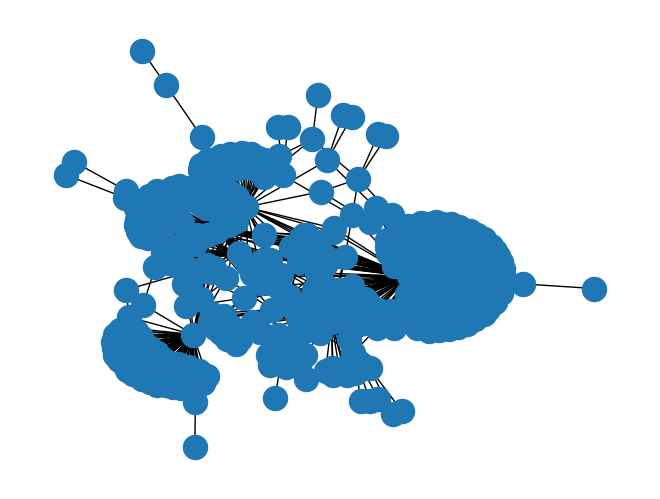

In [123]:
nx.draw(G1)

In [125]:
Graph_list = nx.to_pandas_edgelist(G1)
print(Graph_list)

     source  target
0       674    1270
1       674     524
2       571    1859
3       571       2
4       571     524
..      ...     ...
662     741    1891
663     864    1661
664     864    1588
665     459     460
666     461     460

[667 rows x 2 columns]


In [126]:
Graph_list.to_csv(my_path + "/Data_postproc" + '/Comm1.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)